### Tensflow + One Hot简单案例实现

**About OneHot**  
关于处理如果存在`C（C > 2）`类标签，如何处理，采用`OneHot`编码，转为`0 ~ C - 1`个, 如下：  
$$
\begin{bmatrix}
  1 &2 &3  &0  &3
\end{bmatrix} =>  
\begin{bmatrix}
  0 &0  &0  &0 \\
  1 &0  &0  &0 \\
  0 &1  &0  &0 \\
  0 &0  &1  &1
\end{bmatrix} \tag{1} 
$$
其中， $0 => [0, 0, 0, 0]^T,1 => [0, 1, 0, 0]^T,2 => [0, 0, 1, 0]^T,3 => [0, 0, 0, 1]^T$

**Tensflow 框架实现**

In [1]:
import pandas as pd

# 读取两个CSV文件
df1 = pd.read_csv(r"D:\machine_learning\DeepL\Lab\data\archive\sign_mnist_test.csv")
df2 = pd.read_csv(r"D:\machine_learning\DeepL\Lab\data\archive\sign_mnist_test\sign_mnist_test.csv")

# 比较两个DataFrame
comparison = df1.equals(df2)

print(f"两个文件相同: {comparison}")

两个文件相同: True


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
# 读取数据
train_data = pd.read_csv(r"D:\machine_learning\DeepL\Lab\data\archive\sign_mnist_train.csv")
test_data = pd.read_csv(r"D:\machine_learning\DeepL\Lab\data\archive\sign_mnist_test.csv")
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [12]:
train_data.shape

(27455, 784)

数据集以标签和像素值的形式给出，范围从像素1到像素784，即28 * 28图像。

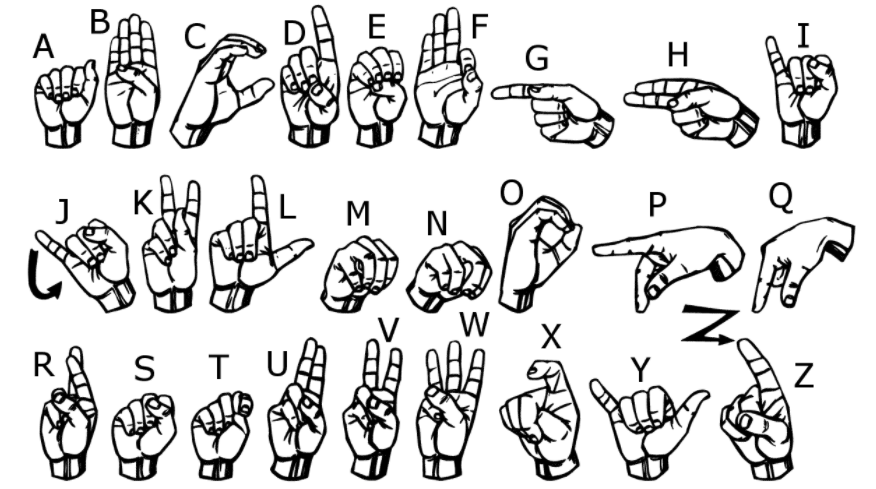

In [3]:
Image(r"D:\machine_learning\DeepL\Lab\data\archive\american_sign_language.PNG")

In [4]:
labels = train_data['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

(27455, 785)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

C:\Users\86151\AppData\Local\Temp\ipykernel_18784\1474990973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='Set1', color='blue')  # 或者使用其他颜色


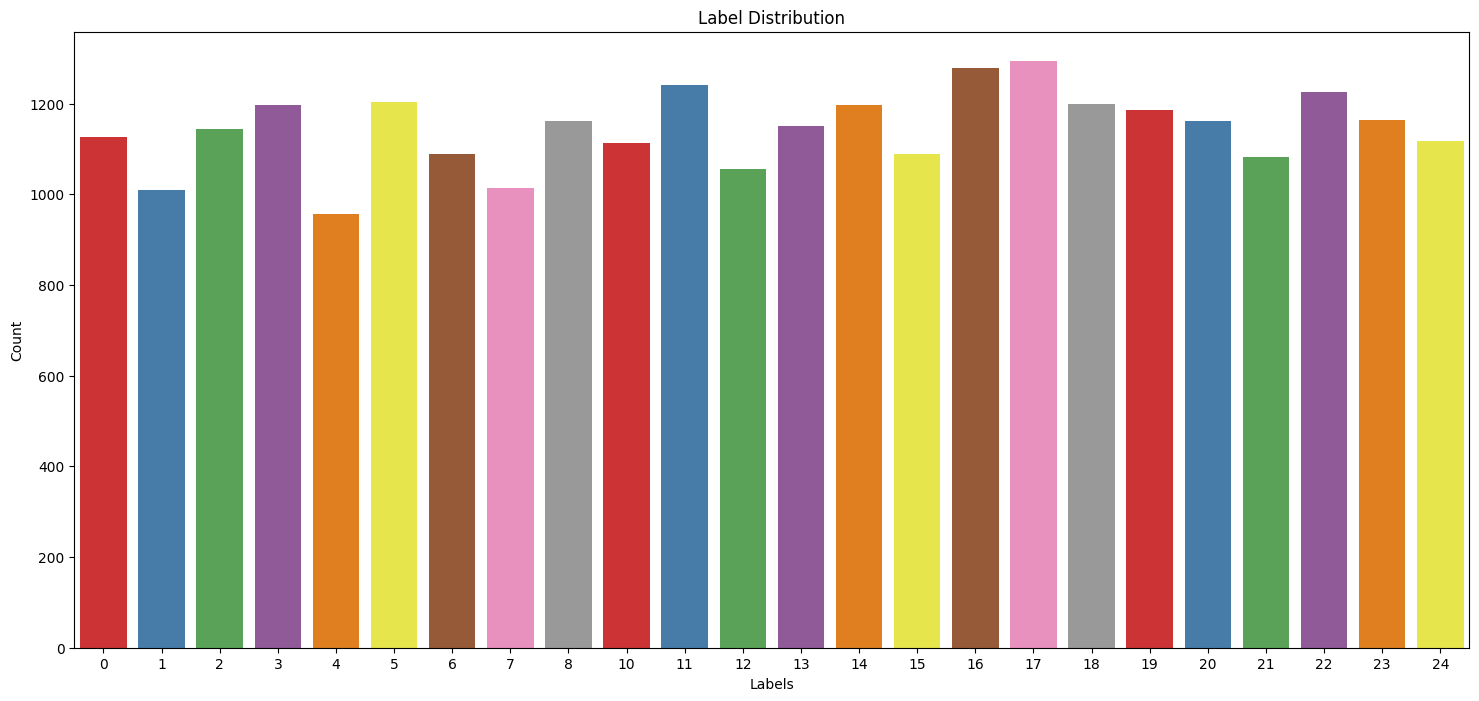

In [5]:
plt.figure(figsize=(18, 8))
sns.countplot(x=labels, palette='Set1', color='blue')  # 或者使用其他颜色
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

删除标签列，方便数据操作

In [6]:
train_data.drop('label', axis = 1, inplace = True)

In [7]:
images = train_data.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images]) # 展平

### 二值化(OneHot)编码labels

In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

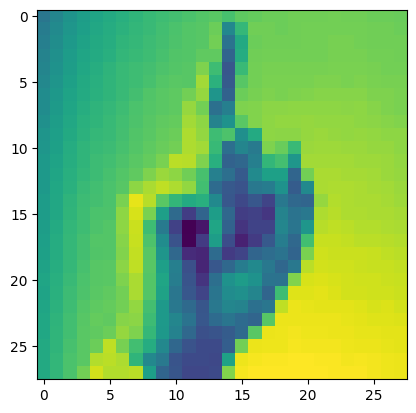

In [9]:
plt.imshow(images[0].reshape(28,28))

In [81]:
from tensorflow.keras import layers, models

batch_size = 128
num_classes = 24
epochs = 50

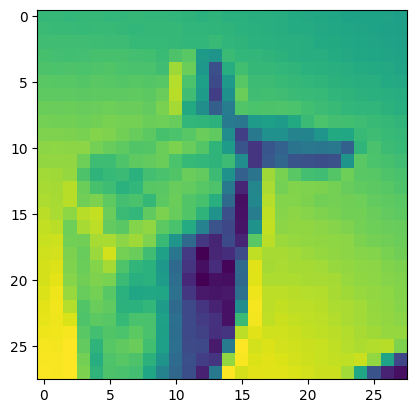

In [82]:
x_train, x_val, y_train, y_val = train_test_split(
    images, labels, test_size = 0.30, random_state = 43)
x_train = x_train / 255
x_val = x_val / 255
plt.imshow(x_val[0].reshape(28,28))

In [83]:
x_train = np.array(x_train)
x_val = np.array(x_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
print("Train data shape:", x_train.shape)  # 应输出 (num_samples, 28, 28) 或 (num_samples, 784)
print("Validation data shape:", x_val.shape)  # 应输出 (num_samples, 28, 28) 或 (num_samples, 784)
# 构建模型
model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 输入展平的形状
model.add(layers.Dense(128, activation='relu'))  # 隐藏层
model.add(layers.Dense(24))  # 输出层，假设有6个类别
model.add(layers.Softmax())  # Softmax 输出

Train data shape: (19218, 784)
Validation data shape: (8237, 784)


In [84]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # 对于整数标签
              metrics=['accuracy'])

In [85]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1251 - loss: 3.0393 - val_accuracy: 0.3249 - val_loss: 2.3688
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3876 - loss: 2.1831 - val_accuracy: 0.4740 - val_loss: 1.8067
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5156 - loss: 1.7167 - val_accuracy: 0.6039 - val_loss: 1.4833
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5985 - loss: 1.4483 - val_accuracy: 0.6399 - val_loss: 1.3105
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6483 - loss: 1.2619 - val_accuracy: 0.6777 - val_loss: 1.1635
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6836 - loss: 1.1349 - val_accuracy: 0.6992 - val_loss: 1.0624
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6999 - loss: 1.0402 - val_accuracy: 0.7398 - val_loss: 0.9533
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7457 - loss: 0.9336 - val_accuracy: 0.

In [86]:
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9970 - loss: 0.0694
Validation accuracy: 99.67%


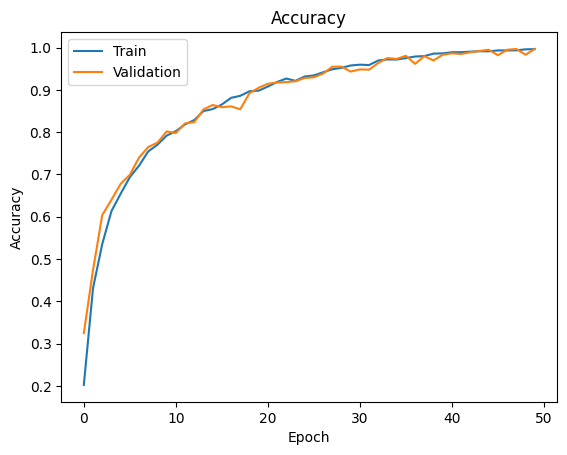

In [87]:
import matplotlib.pyplot as plt

# 绘制准确率图
plt.plot(history.history['accuracy'])  # 训练集准确率
plt.plot(history.history['val_accuracy'])  # 验证集准确率
plt.title("Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])  # 更新图例

plt.show()


测试在训练集上的准确率

In [1]:
test_labels = test_data['label']
test_data.drop('label', axis = 1, inplace = True)

NameError: name 'test_data' is not defined

In [89]:
test_images = test_data.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 784)
test_images.shape

(7172, 784)

In [90]:
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7190462911321807

`Input-Linear-ReLu-Linear-softmax`在训练集上表现良好但是，测试集上表现不好，提升层数，修改超参数  
或许对dev的处理至关重要

`Created by Liu.`  
`Data from Kaggle`